# Início: 21/09/2021

Neste capítulo, vamos começar avaliando o modelo de Regressão Linear, um dos modelos mais simples que há. Abordaremos duas formas de treiná-lo:
- Usando uma equação de "forma fechada", onde calcula diretamente os parâmetros do modelo que melhor se encaixam no conjnto de treinamento, isto é: os parâmetros do modelo que minimizam a função de custo em relação ao conjunto de treinamento;
- Usando uma abordagem interativa de oimização conhecida como *Gradiente Descendente* (GD), onde os parâmetros-modelo são pegos de modo gradual para minimizar a função custo do conjunto de treinamento, às vezes convergindo-o para o mesmo conjunto de parâmetros do método acima. Algumas variantes de GD serão vistas para o uso na parte II em redes neurais: *Batch GD*, *Mini batch GD* e *Stochastic GD*.

Saindo de Regressão Linear, iremos para Regressão Polinomial, um modelo mais complexo que pode se ajustar em conjuntos de dados não lineares. Como esse modelo possui mais parâmetros que a Regressão Linear, a Regressão Polinomial é mais propenso ao sobreajuste dos dados de treinamento. Mas não nos preocupemos com isso, pois veremos como detectar se isso ocorre ou não, usando curvas de aprendizado, e, depois, analisaremos técnicas de regularização que podem reduzir o risco de sobreajuste no conjunto.

Por fim, veremos mais dois modelos que são comumente usados para as tarefas de classificação: Regressão Logística e Regressão Softmax.

### Regressão Linear

No capítulo 1, vimos um modelo simples de regressão sobre a satisfação de vida: *Theta0 + Theta1 x GDP_per_capita*.

Este modelo é apenas uma função linear característica de entrada **GDP_per_capita**. *Theta1* e *Theta2* são os parâmetros do modelo.

De modo geral, um modelo linear prevê algo calculando uma soma ponderada das características de entrada, mais uma constante de *termo de polarização* (conhecida também como *coeficiente linear*), como mostrado na equação abaixo:



***Previsão do modelo de Regressão Linear***

Onde:
- *ŷ* é o valor previsto;
- *n* é o número de características;
- *xn* é o valor da n-ésima característica e;
- *θj* é o parâmetro do modelo j (incluindo o termo de polarização *θ0* e os pesos das características *θ1*, *θ2*, ⋯, *θn*).

A equação acima pode ser escrita de uma maneira bem mais consisa usando uma forma vetorial:



***Previsão do modelo de Regressão Linear (forma vetorizada)***

Onde:
- *θ* é o vetor de parâmetros do model, que contém o termo de plarização *θ0* e os pesos das características *θ1* até *θn*;
- *θT* é a de transposição de *θ* (um vetor linha em vez de um vetor coluna);
- **x** é o *vetor de características* da instância, que contém *x0* a *xn* com *x0* sempre igual a 1;
- *θT* . **x** é o produto escalar de *θT* e **x** e;
- *hθ* é a função de hipótese, que utiliza os parâmetros do modelo θ.

Beleza, até agora vimos a teoria por trás do modelo de Regressão Linear, mas como o treinamos? Bem, vale lembrar que treinar um modelo significa configurar seus parâmetros para que tenham o melhor ajuste no conjunto de treinamento. Para esta finalidade, é necessário primeiro de uma medida de quão bem (ou mal) o modelo se adaptará aos dados de treinamento fornecido. No Capítulo 2, vimos qe a medida de desempenho mais comum para a Regressão Linear é a Raiz do Erro Quadrático Médio (RMSE). Logo, para treinar um modelo de Regressão Linear, devemos encontrar o valor de *θ* que minimize ao máximo o RMSE. Na prática, é mais simples diminuir o Erro Quadrático Médio (MSE) do que a RMSE, e leva ao mesmo resultado, uma vez qe o valor que minimiza uma função também minimiza sua raíz quadrada.

O MSE de uma hipótese *hθ* de Regressão Linear em um conjunto de treinamento **X** é calculada pela equação abaixo:

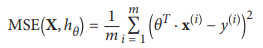

***Função MSE de custo para um modelo de Regressão Linear***

A maior parte das notações está descrita no Capítulo 2 em **Notações**. A única diferença aqui é a presença do *hθ* ao invés no *h* para deixar evidente que o modelo é parametrizado pelo vetor *θ*. Para simplificar a vida, escreveremos MSE(*θ*) ao invés de MSE(**X**, *hθ*).

**Método dos Mínimos Quadrados**

Para achar o valor de *θ*, há uma *solução de forma fechada*, ou seja, uma equação matemática qe dá o resultado diretamente. Isto é conhecido como *Método dos Mínimos Quadrados*

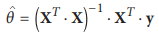

***Método dos Mínimos Quadrados***

Onde:
- *θ^* é o valor de *θ* que minimiza a função de custo e;
- **y** é o vetor dos valores do alvo contendo *y(1) a *y(m)*.

Geraremos algns dados de aparência linear para restar a equação acima:

In [9]:
import numpy as np

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('axes', labelsize=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

In [3]:
np.random.seed(98)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

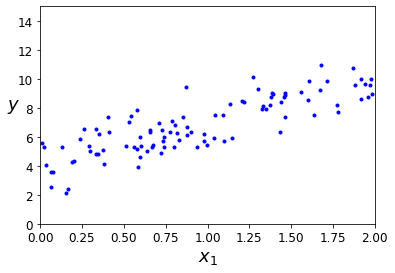

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Agora vamos calcular *θ^* usando o Método dos Mínimos Quadrados. Usaremos a função **inv()** do módulo de Álgebra Linear do NumPy (**np.linalg**) para calcular a inverso de uma matriz, e o método **dot()** para a multiplicação da matriz:

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # adiciona x0 = 1 a cada instância
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

A função de *y* que usamos para gerar os dados é *y = 4 + 3x + ruído gaussiano*. Vamos ver o resultado que a equação encontrou:

In [6]:
theta_best

array([[4.08045837],
       [2.90035199]])

Os resultados para *θ0* e *θ1* eram 4 e 3 respectivamente, não 4,08 e 2,90. São valores próximos do teórico, mas o ruído tornou impossível recuperar os parâmetros exatos da função original.

Com o valor de *θ^*, podemos fazer previsões:

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # adiciona x0 = 1 a cada instância
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08045837],
       [9.88116234]])

Os números estão lindos, mas vamos vê-los graficamente:

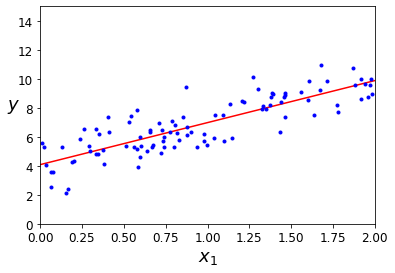

In [8]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

O código acima mas usando o Scikit-Learn:

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.08045837]), array([[2.90035199]]))

In [11]:
lin_reg.predict(X_new)

array([[4.08045837],
       [9.88116234]])

Note que o Scikit-Learn separa o termo de polarização (*intercept_*) dos pesos da característica (*coef_*).

### Gradiente Descendente

*Gradiente Descendente* é um algoritimo de otimização muito genético capaz de encontrar solções para um leque de problemas. A ideia geral do GD é ajustar interativamente os parâmetros para minimizar uma função de custo.

Suponha que estejamos perdidos em uma montanha com nevoeiro; conseguimos sentir a inclinação do solo em nossos pés. Uma boa alternativa para chegar rapidamente ao fundo do vale é descer em direção a encosta mais íngrime. O que fizemos é a mesma coisa que o GD faz: ele mede o gradiente local da função de erro em relação ao vetor de parâmetro *θ*, e vai em direção ao gradiente descendente. Quando o valor de gradiente for igual a 0, o GD chegou ao mínimo, no nosso exemplo, chegamos ao pé da montanha.

Começamos preenchendo *θ* com valores aleatórios (conhecida como *iniciação aleatória*), e então o melhoramos de forma gradual, fornecendo um pequeno passo por vez, cada passo tentando diminuir ao máximo a função de custo (por exempo, o MSE), até que o algoritimo *convirja* para um mínimo.

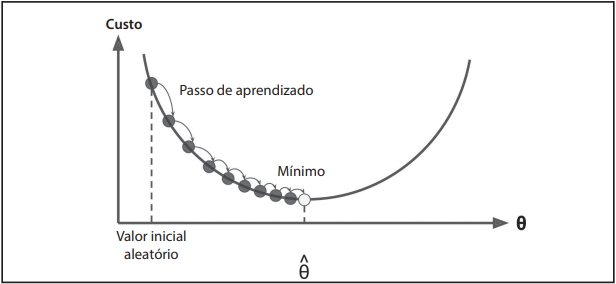

***Gradiente Descendente***

O tamanho dos passos é um parâmetro muito importante do GD, determinado pelo hiperparâmetro *taxa de aprendizado*. Se essa taxa for bem pequena, o algoritimo tera de de passar por muitas interações para convergir, o que levará um tempo considerável.

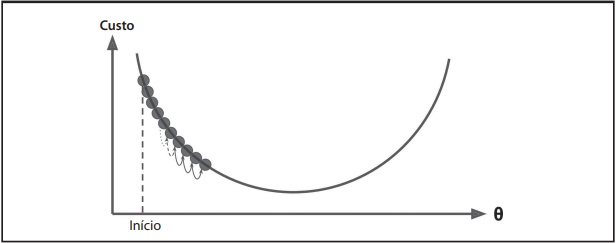

***Taxa de aprendizado muito pequena***

No sentido contrário, se a taxa de aprendizado for muito grande, podemos atravessar o vale e acabar no outro lado, provavelmente mais alto do que antes. Isso pode tornar o algoritmo divergente com valores cada vez maiores, não encontrando uma boa solução.

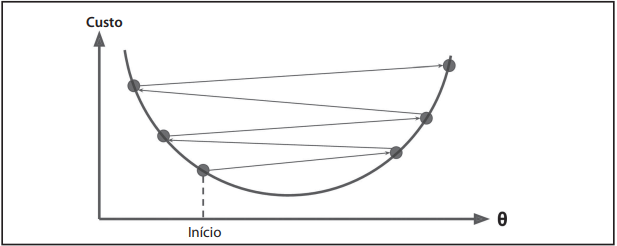

***Taxa de aprendizado muito grande***

Por fim, nem todas as funções de custo se parecem lindas parábolas. Podem conter buracos, planatos e todo tipo de irregularidade no terreno; deixando assim o encontro da convergência mais complicada. A figura abaixo ilustra bem isso com os dois principais desafios encontrados no GD: se a inicialização aleatória iniciar pela esquerda, ela converge para um *mínimo local*, cujo não é tão bom como o *mínimo global*. Se começar à direita, então levará um bom tempo para atravessar o planalto, e se parar antes, nunca atingiremos o mínimo global.

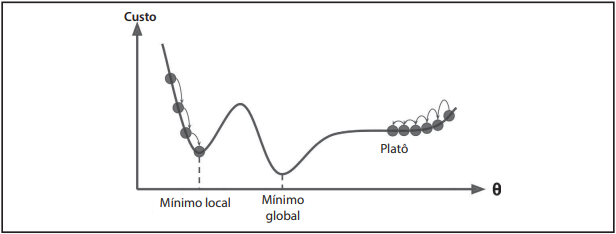

***Armadilhas do Gradiente Descendente***

Felizmente, a função de custo do MSE para os modelos de Regressão Linear é uma *função convexa*, ou seja, se escolhermos quaisquer dois pontos na curva, o segmento de linha que os une nunca cruza. Isso implica que não existe mínimos locais, apenas um único mínimo global. É também um função contínua com um inclinação que nunca se altera abruptamente. Esses fatos juntos criam uma ótima consequência: o GD possui a garantia de se aproximar arbitrariamente do mínimo global, e claro, se esperarmos o tempo suficiente e a taxa de aprendizado não for tão elevada.

A função de custo possui um formato de parábola, porém, se as caraccterísticas possuirem escalas distintas, a função pode ter o formato de uma parábola alongada. A figura a seguir ilustra o GD em um conjunto de treinamento em que as características 1 e 2 possuem a mesma escala (esquerda) e em um conjunto onde a característica 1 tem valores menores do que a característica 2. Uma vez que a característica 1 é menor, é necessário uma mudança maior em *θ1* para afetar a função de custo, motivo pela qual a parábola é alongada ao longo do eixo das abscissas.

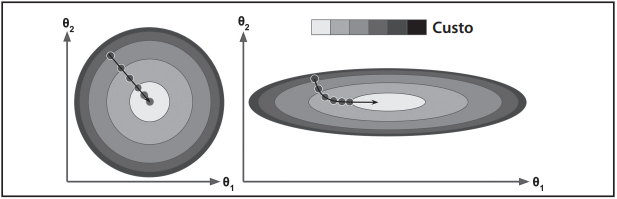

***Gradiente Descendente com e sem escalonamento das características***

Como bem analisado, a imagem à esquerda, o GD vai diretamente para o mínimo, atingindo-o diretamente. Por outro lado, à direira, o GD avaçna em sentido quase ortogonal em direção ao mínimo global e termina com uma longa marcha em um vale quase plano. Ambos encontrarão o mínimo global, mas o da direita levará muito mais tempo.

O diagrama acima mostra também o fato de que treinar um modelo significa procurar uma combinação de parâmetros do modelo que minimizem uma função de custo (em relação ao conjunto de treinamento). É uma pesquisa no *espaço de parâmetro* do modelo: quanto mais parâmetros o modelo tem, mais dimensões este espaço tempo e mais difícil será a bsca: procurar uma agulha em um palheiro de 300 dimensões é bem mais complicado do que em 3 dimesões. Felizmente, como em Regressão Linear, a função de custo é convexa, a agulha estará na parte inferior do palheiro.

**Gradiente Descendente em Lote**

Para colocar em prática o GD, é necessário calcular o gradiente da função de custo em relação a cada parâmetro do modelo *θj*. De maneira mais simples, devemos calcular quanto mudará a função de custo se modificarmos somente um pouco o *θj*. Isto é conhecido como *deriva parcial*. É a mesma coisa se perguntassemos: "qual é a inclinação de uma montanha sob meus pés se eu me virar ao leste?", e, então, fazer a mesma pergunta olhando para o norte e assim por diante, por todas as dimensões. A equação a seguir calcula a derivada parcal da função de custo em relação ao parêmetro *θj*.

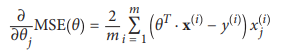

***Derivadas parciais da função de custo***

Mas ao invés de calcular individualmente cada derivada, podemos utilizar a equação a segir para calculá-las de uma vez só. O vetor gradiente, descrito como ∇θMSE(θ), contém todas as derivadas parciais da função de custo, uma para cada parâmetro do modelo.

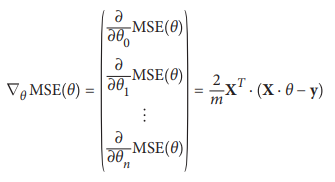

***Vetor gradiente da função de custo***

Vale notar que a fórmula acima envolve cálculos em cada etapa do GD sobre um conjunto completo de treinamento **X**. É por isso que esse algoritmo é chamado de *Gradiente Descendente em Lote*: ele usa todo o lote de dados em cada etapa. Por conta disso, ele é exageradamente lento para conjuntos enormes. Contudo, o GD dimensiona-se bem com a quantidade de características; treinar um modelo de Regressão Linar, quando existe centenas de milhares de características, será muito mais rápido se usarmos o GD do que utilizarmos o Método dos Mínimos Quadrados.

Uma vez encontrado o vetor gradiente, que aponta para cima, basta ir na direção contrária para descer. Isto que dizer que devemos subrtair ∇θMSE(θ) de *θ*. É aqui onde a taxa de aprendizado *η* (Eta, o nosso "H") entra na jogada: multiplicar o vetor gradiente por *η* para determinar o tamanho do passo para baixo.

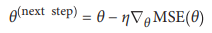

***Passo do Gradiente Descendente***

Vejamos uma implementação rápida desse algoritmo:

In [12]:
eta = 0.1 # taxa de aprendizado
n_iteractions = 1000
m = 100

np.random.seed(98)
theta = np.random.randn(2, 1) # inicialização aleatória

for iteraction in range(n_iteractions):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

Isso não foi nada complicado, vejamos o valor de **theta**:

In [13]:
theta

array([[4.08045837],
       [2.90035199]])

Os valores de **theta** encontrados pelo GD são os mesmos do Método dos Mínimos Quadrados! Mas, e se estivermos utilizando uma taxa de apredizado **eta** diferente? Usando três taxas de aprendizado distintas, os gráficos abaixo mostram os primeiros 10 passos do GD, a linha tracejada representa o ponto inicial:

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iteractions = 1000
    for iteraction in range(n_iteractions):
        if iteraction < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteraction > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(fr'$\eta = {eta}$', fontsize=16)

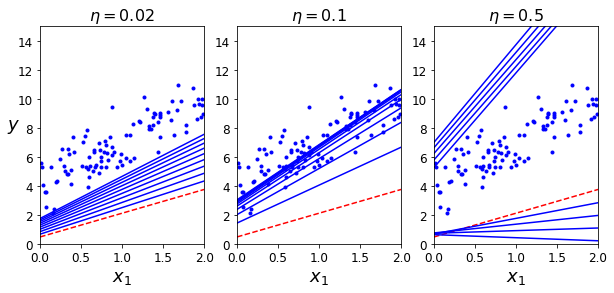

In [15]:
np.random.seed(98)
theta = np.random.randn(2, 1) # inicialização aleatória

plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta= 0.1,
                                       theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

A taxa de aprendizado na esquerda é muito baixa: o algoritmo acaba por alcançar a solução, mas demorará demais. No meio, a taxa de aprendizado parece promissora: com apenas algumas interações já convergiu para a solução. A da direita, a taxa de aprendizado é muito alta: o algoritmo diverge, pulando por todo o lado e, de fato, ficando cada vez mais distante da solução.

Mas podemos estar nos perguntando como é possível configurar o número de interações. Se esse número for muito baixo, ainda estaremos longe da solução idela quando o algoritimo parar, mas, se for muito alto, perderemos tempo quando os parâmetros do modelo não mudarem mais. Uma alternativa simples é definir m grande número de iterações para interromper o algoritmo quando o vetor do gradiente se tornar pequeno, isto é: quando sua norma se tornar menor do que o minúsculo número **ϵ** (conhecido como *tolerância*), porque isso ocorre quando o GD (quase) atinge o mínimo.

**Gradiente Descendente Estocástico**

O principal problema com o Gradiente Descendente em Lote é o fato de que esse algoritmo utiliza todo o conjunto de treinamento para calcular os gradientes em cada passo, o que deixa o processo muito lento se existir muitos dados. Na outra ponta, o *Gradiente Descendente Estocástico* (SGD) seleciona uma instância aleatória no conjunto de treinamento em cada etapa e calcula os gradientes baseado apenas em uma única instância. A consequência disso é que esse algoritimo realiza essa tarefa de maneira rápida (comparado com o anterior), pois possui poucos dados para manipular em cada iteração. Também permite treinar em grandes conjuntos de treinamento, uma vez que apenas uma instância necessita estar na memória a cada iteração.

Como tudo na vida tem prós e contras, o contra do SGD é que devido a sua natureza estocástica (aleatória), ele é bem menos regular do que o Gradiente Descendente em Lote: ao invés de diminuir de forma suave até o mínimo, a função custo vai subir e descer, diminuindo apenas na média. Ao passar do tempo, ele acabará bem perto do mínimo, mas quando chega lá, ele continuará a rebaterm nunca entrando em um estado de estabilidade. Desse modo, quando o algoritimo para, os valores dos parâmetros serão bons, mas não ótimos.

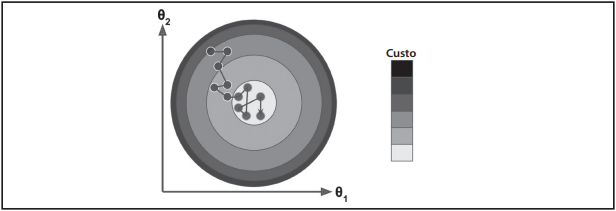

***Gradiente Descendente Estocástico***

Quando a função de custo é muito irregular (como em ***Armadilhas do Gradiente Descendente***), isso pode, na verdade, ajudar o alguritmo a pular fora do mínimo local, de maneira que o SGD terá uma chance maior de encontrar o mínimo global do que o Gradiente Descendente em Lote.

Desta maneira, a aleatoriedade é boa para escapar do ótimo local, mas ruim por nunca estabelecer-se no mínimo. Uma saída para esse dilema é reduzir de maneira gradual a taxa de aprendizado. As etapas começam grandes (o que deixa rápido os progressos e a escapar dos mínimos locais) e depois diminuem, permitindo que o algiritmo permaneça no mínimo global. Este processo é conhecido como *recozimento simulado*, porque se assemelha ao processo de recozimento na metalurgia no qual o metal fundido é resfriado lentamente. A função que determina a taxa de aprendizado em cada iteração é chamada de *cronograma de aprendizado*. Se a taxa de aprendizado for reduzida de forma rápida, poderemos ficar presos no mínimo local, ou mesmo acabar encalhados a meio caminho do mínimo. Se a taxa de aprendizado for diminuindo devagar, podemos saltar em volta do mínimo por um longo período de tempo e acabar com uma solução insuficiente se parar o treinamento muito cedo.

Usando um simples cronograma de aprendizado, o código abaixo implementa o Gradiente Descendente Estocástico:

In [16]:
n_epochs = 50
t0, t1 = 5, 50 # hierparâmetros de aprendizado

In [17]:
def learning_schedule(t):
    return t0 / (t + t1)

In [18]:
np.random.seed(98)
theta = np.random.randn(2, 1) # inicialização aleatória

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

Por convenção, repetimos por rodadas de *m* iterações; cada rodada é chamada de *epoch* (época). Enqanto o código do Gradiente Descendente em Lote repete 1000 vezes pelo conjunto de treino, o código acima do SGD replica somente 50 vezes pelo conjunto e chega em uma boa solução:

In [19]:
theta

array([[4.11487999],
       [2.82062024]])

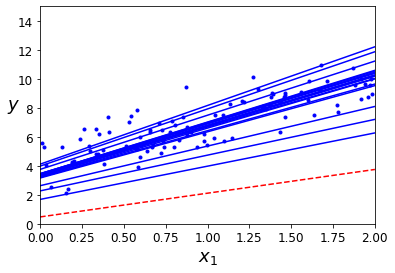

In [20]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(98)

theta = np.random.randn(2, 1)


for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 
    
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

Vale notar que, como as instâncias são escolhidas de modo aleatório, algumas poderão ser escolhidas diversas vezes por época, equanto outras não. Outra aborgadem seria diminuir o conjunto de treinamento, passar instância por instância, embaralhar de novo e assim sucessivamente, se quisermos ter certeza de que o algoritmo passará em cada época por todas as instâncias. No entanto, isso diminuirá a convergência.

Para executar a Regressão Linear usando o SGD com Scikit-Learn, podemos aplicar a classe **SGDRegressor**, que otimixa o padrão da função de custo de erro quadrático. O código abaixo roda 50 épocas (**max_iter=50**), iniciando com uma taxa de aprendizado de 0,1 (**eta=0.1**), usando o cronograma padrão de aprendizado (diferente do anterior), com uma semente fixa (**random_state=98**) e dispensado qualquer regularização (**penalty=None**; mais detalhes em breve):

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd_reg = SGDRegressor(max_iter=50, eta0=0.1,
                      random_state=98, penalty=None)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=98)

Mais uma vez, encontramos uma solução bem príxima da entregue pelo Método dos Mínimos Quadrados:

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06996612]), array([2.89318695]))

**Gradiente Descendente em Minilotes**

O último algoritmo que veremos de GD é o *Gradiente Descendente em Minilotes*. É simples entender esse algoritmo quando conhece o o Gradiente Descendente em Lotes e Estocástico: ao invés de calcular os gradientes a cada etapa baseando-se no conjunto completo de treino (como o GD em Lotes) o com base em apenas uma instância (como o SGD), o GD em Minilotes realiza o cálculo dos gradientes em pequenos conjuntos aleatórios de instâncias chamados de *minilotes*. A principal vantagem do GD em Minilotes em relação ao SGD é que podemos obter um ganho de desempenho na otmização de hardware das operações da matriz, especialmente quando as GPUs são usadas.

O progresso do algoritmo no espaço dos parâmetros retorna menos erros do que o SGD, particularmente com minlotes bem grandes. Como consequência, o GD em Minilotes ficará um pouco mais perto do mínimo, comparado com o SGD. Contudo, pode ser mais difícil escapar do mínimo local. O gráfico a seguir apresenta os caminhos seguidos pelos três algoritmos do GD no espaço do parâmetro durante o treino. Todos terminam perto do mínimo, mas o caminho do GD em Lote fica bem no mínimo, o Estocástico e o Minilote continuam a caminhar, mesmo passando pelo mínimo global. Vale ressaltar que o GD em Lote demora mais tempo para dar cada passo:

In [24]:
theta_path_mgd = []

n_iteractions = 50
minibatch_size = 20

np.random.seed(98)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000

t = 0

for epoch in range(n_iteractions):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i: i+minibatch_size]
        yi = y_shuffled[i: i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [25]:
theta

array([[4.05525664],
       [2.84758097]])

In [26]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

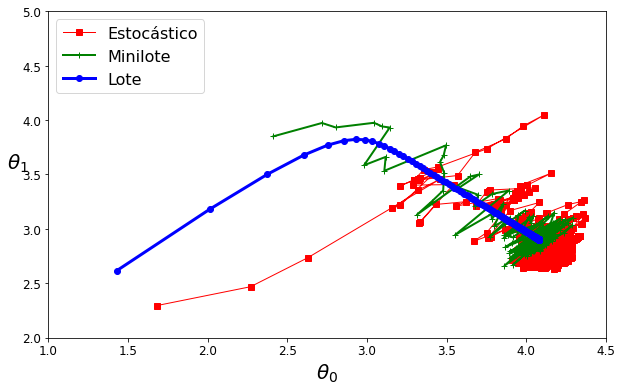

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1],
        'r-s', linewidth=1, label='Estocástico')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1],
        'g-+', linewidth=2, label='Minilote')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1],
        'b-o', linewidth=3, label='Lote')
plt.legend(loc='upper left', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', fontsize=20, rotation=0)
plt.axis([1, 4.5, 2, 5])
plt.show()

A tabela a seguir mostra a comparação entre os algoritmos de GD com a Regressão Linear. Lembrando que *m* é o número de instâncias e *n*, o número de características.

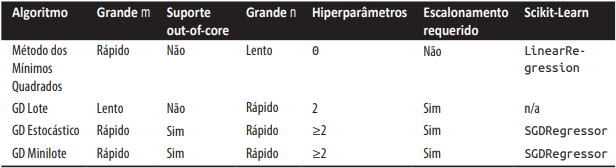

***Comparação de algoritmos para a Regressão Linear***

### Regressão Polinomial

E se os nossos dados forem realmente mais complexos do que uma simples reta? Por mais contraditório que pareça, é possível utilizar um modelo linear para acomodar dados não lineares. Uma maneira simples de realizar essa tarefa, é adicionar potências de cada características como novas características e, em seguida, treinar um modelo linear neste conjunto estendido de características. Esta técnica é conhecida por *Regressão Polinomial*.

Vejamos o exemplo a seguir. Primeiro, vamos criar algum dados não linear baseado em uma simples *equação de 2º grau*, com algum ruído:

In [28]:
np.random.seed(98)
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

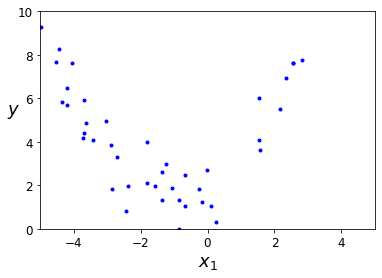

In [29]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-5, 5, 0, 10]) # tem bem mais dados, só excluir essa linha que mostra tudo
plt.show()

É óbvio que uma linha reta nunca acomodará de maneira satisfatória esses dados. Então, usaremos a classe **PolynomialFeatures** do Scikit-Learn para transformar nossos dados de treino adicionando o quadrado (polinômio de 2º grau) de cada característica como novas no conjunto de treino:

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [32]:
X[0]

array([-0.15769751])

In [33]:
X_poly[0]

array([-0.15769751,  0.02486851])

**X_poly** agora possui a característica original de **X** mais o quadrado dessa característica. Agora, podemos acomodar uma reta de forma satisfatória com o **LinearRegression** a esses dados estendidos de treinamento:

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [35]:
lin_reg.intercept_, lin_reg.coef_

(array([1.9062709]), array([[0.99507991, 0.50134072]]))

In [36]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

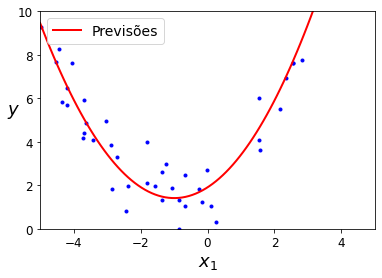

In [37]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Previsões')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-5, 5, 0, 10])
plt.show()

Nada mal: o modelo estima *y = 0,50x^2 + 0,99x + 1,90* quando a teoria diz que a original é: *y = 0,5x^2 + 1x + 2 + Ruído Gaussiano*.

Note que, quando existir diversas características, a Regressão Polinomial é capaz de encontrar relações entre elas, algo que a Regressão Linear não consegue fazer. Iesto só é possível porque a classe em questão também adiciona todas as combinações de características até o grau fornecido. Por exemplo, se existisse duas características **PolynomialFeatures**, *a* e *b*, com **degree=3**, elas não apenas adicionariam as características *a^2*, *a^3*, *b^2* e *b^3*, mas também as combinações *ab*, *a^2b* e *ab^2*.

### Curvas de Aprendizado

Ao executarmos a Regressão Polinomial de alto grau, provavelmente acomodaremos os dados de treinamento de maneira muito mais stisfatória do que com a Regressão Linear simples. Por exemplo, o código abaixo aplica m modelo polinomial de 250 graus aos dados de treinamento anteriores e compara o resultado com um modelo linear puro e um modelo quadrático. Note como o modelo de 250 graus se move para aproximar-se o máximo possível das instâncias de treinamento.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

D:\Jupyter\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
D:\Jupyter\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


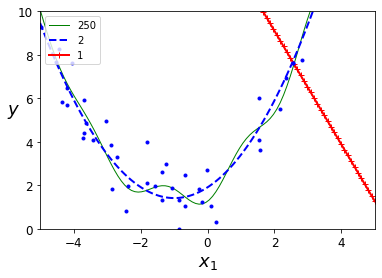

In [39]:
for style, width, degree in (('g-', 1, 250),
                            ('b--', 2, 2),
                            ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree,
                                         include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree),
            linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-5, 5, 0, 10])
plt.show()

Naturalmente, o modelo de Regressão Polinomial de Grau Elevado (grau 250) está sobreajustando-se de modo excessivo aos dados de treinamento. Por outro lado, o modelo de Regressão Linear (grau 1) está subajustando-se a ele. O modelo que melhor generaliza esses dados é o quadrático (grau 2). Isso tem sentido porque os dados foram gerdos com a utilização de uma função do segundo grau, porém, de maneira geral, não saberemos qual o grau da função que gerou os dados, esntão como podemos decidir a complexidade do nosso modelo? Como poderemos saber se o modelo está sobreajustando o subajustando aos dados?

Ao longo do Capítulo 2, utilizamos a validação cruzada para saber a estimativa do desempenho de generalização do modelo. Se um modelo funciona bem nos dados de treinamento, mas generaliza mal de acordo com as métricas de validação cruzada, nosso modelo é **sobreajustado**. Se ele vai mal em ambos, então é **subajustado**. Esse é uma maneira fácil e rápida de saber quando um modelo é muito mais simples ou complexo.

Além da maneira acima, seria olhar para as *crvas de aprendizado*: são plotagens de desempenho do modelo no conjunto de treino e no conjunto de validação como uma função do tamanho do conjunto de treino (ou a iteração de treinamento). Para gerar as plotagens, é somente treinar o modelo diversas vezes em subconjuntos de tamanhos distintos no conjunto de treino. O código a seguir define um função que mostra as curvas de aprenizado de alguns dados de treino e um dado modelo:

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [94]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                     test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,
                                              y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,
                                            y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2,
            label='Treino')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3,
            label='Validação')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Tamanho do conjunto de treino', fontsize=14)
    plt.ylabel('RMSE')

Vejamos as curvas de aprenizado do modelo de Regressão Linear Simples:

(0.0, 80.0, 0.0, 50.0)

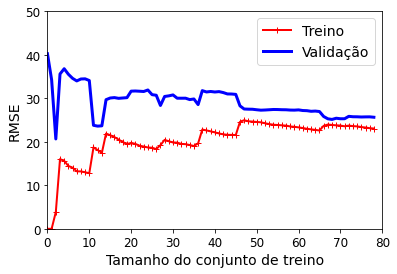

In [126]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 50])

Isso merece uma explicação. Primeiro, analisamos o desempenho dos dados de treino: quando existe apenas uma ou duas instâncias no conjunto de treino, o modelo se ajusta de modo perfeiro, e é por isso que a curva começa no 0. Contudo, ao adicionarmos novas instâncias, torna-se impossível o modelo se ajustar perfeitamente, seja porque são dados com ruídos ou porque não são lineares. Desse modo, esse erro subirá até atingir um platô, um momento em que adicionar novas instâncias não tornará o erro médio muito melhor ou pior. Agora vejamos a performance com os dados de validação. Quando o modelo é treinado em poucas instâncias, ele é incapaz de generalizar de maneira adequada e por isso o erro de validação inicial é grande. Logo, durante a apresentação de mais exemplos de treino, o modelo aprende e, assim, o erro diminui de modo gradual. Todavia, mais uma vez, uma linha reta não consegue fazer um bom trabalho na modelagem dos dados, então o erro termina em um platô bem próximo da outra curva.

Essas curvas de aprendizado são típicas de um modelo **subajustado**. Ambas chegam em um platô; próximas e o valor do erro está alto.

Se o modelo estiver em **sobajuste** com os dados de treino fornecido, não adiantará acrescentar mais dados de exemplos. É necessário usar um modelo mais complexo ou obter melhores características.

Agora, veremos as curvas de aprendizado de um modelo polinomial de grau 10 nos mesmos dados:

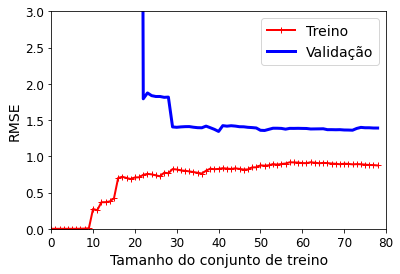

In [138]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10,
                                        include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Essas curvas de aprendizado se parecem com as anteriores, mas existe das diferenças bem importantes:
- O erro nos dados de treinamento é muito inferior ao encontrado no modelo de Regressão Linear e;
- Existe uma lacuna entre as curvas. Isso indica que o modelo possui um desempenho significativamente melhor nos dados de treino do que nos dados de validação, característica típica de um modelo **sobreajustado**. Contudo, se utilizassemos um conjunto de treino muito maior, as duas curvas continuariam a se aproximar.

Uma maneira de melhorar um modelo **sobreajustado** é fornecer mais dados de treinamento até que o erro de validação atinja o erro de treinamento.

**Compensação do Viés/Variância**

Um importante resultado teórico das estatpisticas e do Aprendizado de Máquina é o faro de que o erro de generalização de um modelo pode ser expresso como a soma de 3 erros bem distintos:

*Viés*:
- Esta parte do erro de generalização deve-se a hipóteses erradas, como assumir que os dados são lineares, quando na verdade são quadráticos. Um modelo com *viés* elevado provavelmente se **subajustará** aos dados de teino.

*Variância*:
- Esta parte deve-se a sensibilidade excessiva do modelo a pequenas variações nos dados de treinamento. Um modelo com muitos graus de liberdade (como um modelo polinomial de alto grau) provavelmente terá uma alta variação e, como consequência, se **sobreajustará** aos dados de treino.

*Erro Irredutível*:
- Esta parte deve-se ao ruído dos dados em si. A única maneira de reduzir essa parte do erro é limpar os dados. Por exemplo, corrigir as fontes de dados, como sensores quebrados ou detectar e remover outliers.

Aumentar a complexidade de um modelo geralmente aumentará a variância e diminuirá o viés. Por outro lado, reduzir a complexidade aumentará o viés e diminuirá a variância. E é por isso que se chama **compensação**.

### Modelos Lineares Regularizados

Como visto nos Capítulos 1 e 2, uma boa forma de reduzir o sobreajuste é regularizar o modelo, ou seja, restringí-lo: quanto menor o grau de liberdade, mais complicado será para o modelo sobreajustar os dados. Por exemplo, uma forma simples de regularizar um modelo polinomial é diminuir o número de graus polinomiais.

Para um modelo de Regressão Linear, a regularização é geralmente alcançada so restringir os pesos do modelo. Veremos nesse tópico a *Regressão de Ridge*, *Regressão Lasso* e *Elastic Net*, qe implementam três maneiras distintas de restringir os pesos.

**Regressão de Ridge**

A *Regressão de Ridge* (também conhecida como *Regularização de Tikhonov*) é ma versão regularizada da Regressão Linear: um *termo de regularização* igual a 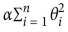 é adicionado na função de custo. Isso força o algoritmo a não apenas ajustar os dados, mas também manter os pesos do modelo o mais reduzido possível. Note que o termo de regularização der ser adicionado à função durante o treinamento. Uma vez treinado o modelo, devemos avaliá-lo usando a medida de desempenho não regularizada.

O hiperparâmetro *α* controla o quanto queremos regularizar o modelo. Se *α* = 0, então a Regressão de Ridge é apenas uma Regressão Linear. Se *α* for muito grande, então todos os pesos chegarão próximo de 0 e o resultado será uma linha que passa pela média dos dados. A equação abaixo apresenta a função de custo da Regressão de Ridge.

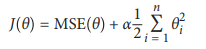

***Função de custo da Regressão de Ridge***

Observe que o termo de polarização *θ0* não é regularizado (a soma começa em *i* = 1, não em 0). Se definirmos o **w** como vetor de pesos das características (*θ1* a *θn*), então o termo de regularização é simplesmente igual a ½(∥ **w** ∥2)^2, onde ∥ · ∥2 representa a norma *l2* do vetor peso. Para o GD, basta adicionar αw ao vetor gradiente MSE.

A plotagem abaixo mostra diversos modelos Ridge treinados em alguns dados lineares com a utilização de diferentes valores de *α*. Na esquerda, modelos simples de Ridge são utilizados levando a previsões lineares. À diretira, usando **PolynomialFeatures(degree=10)**, os dados são primeiramente expandidos e então escalonados com **SandardScaler** e finalmente os modelos Ridge são aplicados nas características resultantes: isto é uma Regressão Polinomial com regularização Ridge. Note como o aumento de *α* leva a previsões mais planas, ou seja, menos extremas, mais razoáveis; isso reduz a variância do modelo, mas aumenta o seu *viés*:

In [41]:
from sklearn.linear_model import Ridge

In [42]:
np.random.seed(98)

m = 20
X = 3 * np.random.randn(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [43]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw,
                label=fr'$\alpha = {alpha}$')
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend(loc='upper left', fontsize=15)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 3, 0, 4])

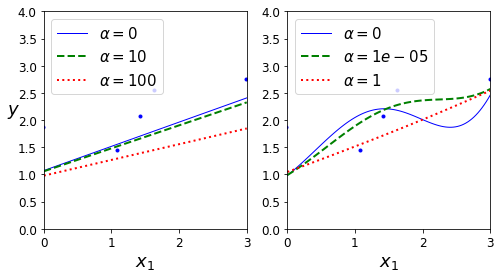

In [44]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100),
           random_state=98)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1),
          random_state=98)

plt.show()

Da mesma maneira que acontece com a Regressão Linear, podemos executar a Regressão de Ridge por através de uma equação em forma fechada ou pelo GD. Os prós e contras são os mesmos. A equação abaixo apresenta uma solução de forma fechada (**A** é a *matriz de identidade n x n* com exceção de 0 na célula superior esquerda, correspondente ao termo de polarização).

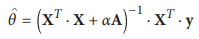

***Solução em forma fechada de Regressão de Ridge***

Como de costume, veremos como executar a Regressão de Ridge com o Scikit-Learn usando uma solução de forma fechada:

In [45]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.73479358]])

E utilizando o SGD:

In [46]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.60208662])

O hiperparâmetro **penalty** define o tipo de termo de regularização para uso. Especificar '**l2**' informa que queremos que o SGD adicione um termo de regularização à função de custo igual a metade do quadrado na forma *l2* do vetor peso: isto é simplesmente Regressão de Ridge.

**Regressão Lasso**

*Least Absolute Shrinkage and Selection Operator Regression*, podendo ser chamada simplesmente de Regressão Lasso, é outra versão regularizada da Regressão Linear: como a Regressão de Ridge, ela adiciona um termo de regularização à função de custo, porém utiliza a norma *l1* d vetor de peso em vez da medade do quadrado da norma *l2*, como mostra a equação a seguir.

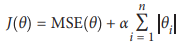

***Funçaõ de custo da Regressão Lasso***

A plotagem abaixo mostra a mesma que a da Regressão Ridge, mas substitui os modelos Ridge por modelos Lasso, além de usar os valores de alfa menores:

In [47]:
from sklearn.linear_model import Lasso

D:\Jupyter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2005527753509972, tolerance: 0.004525913627527262
  model = cd_fast.enet_coordinate_descent(


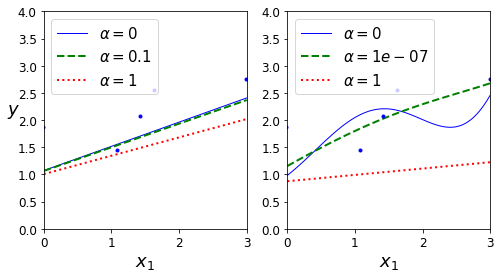

In [48]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1),
          random_state=98)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1),
          random_state=98)

plt.show()

Uma característica importante da Regressão Lasso é que ela tende a eliminar completamente os pesos das características menos importantes, isto é: ajustá-las para 0. Por exemplo, a linha prontilhada verde na direita (*α* = 10^-7) parece quadrática, quase linear: todos os pesos para as características polinomiais de alto grau (no caso, grau 10) são iguais a 0. Em outras palavras, a Regressão Lasso executa automaticamente a seleção de características e exibe um modelo esparso, ou seja, com poucos pesos de características diferentes de 0.

Podemos ter uma ideia do motivo disso olhando a plotagem a seguir. Na plotagem à esquerda, os contornos de fundo (elipses) representa uma função de custo MSE não regulada (*α* = 0), e o círculo branco mostra o caminho do Gradiente Descendente em Lote com a função de custo. Os contornos do primero plano (diamantes) representam a penalidade *l1* e os triângulos mostram o caminho do Gradiente Descendente em Lote apenas para esta penalidade (*α* → ∞). Veja como o caminho primeiro atinge *θ1* = 0, então rola por uma calha até atingir *θ2* = 0. Na plotagem superior direita, os contornos representam a mesma função de custo mais uma penalidade de *l1* com *α* = 0,5. O mínimo global está no eixo *θ2* = 0. O Gradiente Descendente em Lote primeiro chega em *θ2* = 0, depois rola a calha até atingir o mínimo global. As duas plotagens de baixo mostram o mesmo, mas utilizam a penalidade *l2*. O mpinimo regularizado está mais próximo de *θ* = 0 do que o mínimo não regulamentado, porém os peses não são totalmente eliminados:

In [49]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignorar o termo bias
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [50]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

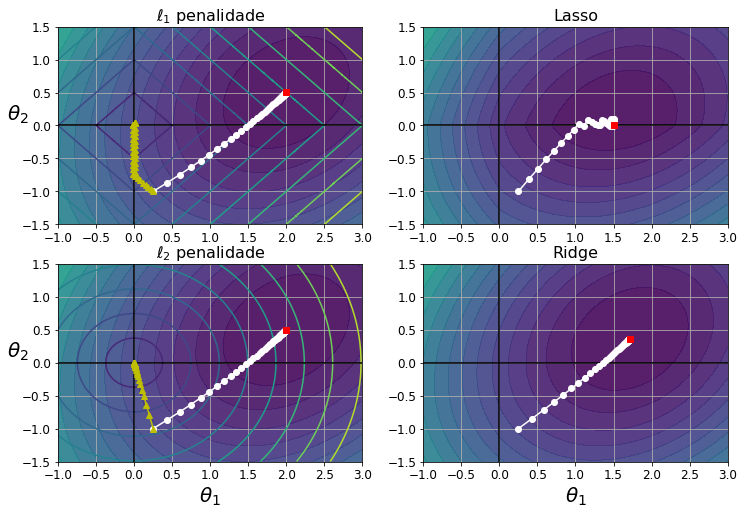

In [51]:
plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(fr"$\ell_{i+1}$ penalidade", fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
        
plt.show()

A função de custo Lasso não é diferenciável em *θi* = 0(para *i* = 1, 2, ... *n*), mas o Gradiente Descendente ainda funciona de maneira satisfatória se utilizarmos o *vetor subgradiente* **g** quando qualqer *θi* for 0; A equação abaixo mostra o cálculo do vetor subgradiente que podemos utilizar para o Gradiente Descendente com a fnção de custo Lasso.

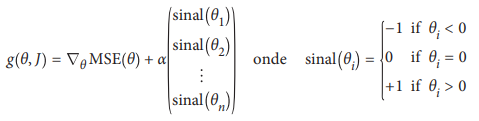

***Vetor subgradiente da Regressão Lasso***

Vejamos um exemplo do Scikit-Learn usando a classe Lasso:

In [52]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.71714927])

E usando o SGD com **penalty=l1**:

In [53]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.58552762])

**Elastic Net**   

*Elastic Net* é um meio termo entre a Regressão de Ridge e a Regressão de Lasso. O termo de regularização é uma simples mistura dos termos de regularização de Lasso e Ridge, e podemos controlar a taxa de mistura *r*. Quando *r* for igual 0, o Elastic Net funciona da mesma maneira que a Regressão de Ridge, e quando *r* igual a um, funciona como a Regressão Lasso.

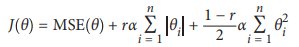

***Função de custo Elastic Net***

Portanto, quando usar uma simples Regressão Linear (por exemplo, sem qualquer regularização) Ridge, Lasso ou Elastic Net? Na maior parte dos casos, é preferível ter im pouco de reglarização, então geralmente devemos evitar uma Regularização Linear por si só. Usar a Ridge é um bom padrão, porém, se suspeitarmos que apenas uma das características são úteis, é melhor usarmos a Lasso ou Elastic Net, porque elas tendem a redir a zero os pesos das características inúteis. De modo geral, a Elastic Net é preferida à Lasso; uma vez que esta pode se comportar de maneira equivocada quando o número de características for maior do que o número de instâncias de treinamento ou quando várias características estiverem fortemente correlacionadas.

Abaixo, um pequeno exemplo usando o **ElasticNet** do Scikit-Learn (**l1_ratio** é a taxa de mixagem *r* na equação):

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.72352177])

**Parada Antecipada**

Um jeito ímpar de regularizar algoritmos de aprendizado iterativos, como os GDs, é interromper o treinamento assim que o erro de validação aingir um mínimo. Isto é conhecido como *parada antecipada*. O código abaixo mostra um modelo complexo (no caso, um modelo de Regressão Polinomial de alto grau) sendo treinado com o uso de Gradiente Descedente em Lote. Conforme as épocas ocorrer, o algoritmo aprende e seu erro de previsão (RMSE) no conjunto de treino naturalmente cai, levando junto o erro de previsão no conjunto de validação. Contudo, após um tempo, o erro de validação para de cair e volta a subir, um indicativo de que o modelo começou a sobreajustar-se aos dados de treino. Com a parada antecipada, podemos parar o treino assim que o erro de validação chegar ao mínimo. É uma técnica de regularização tão simples que o cientista da computação Geoffrey Hinton a chamou de "*lindo almoço grátis*":

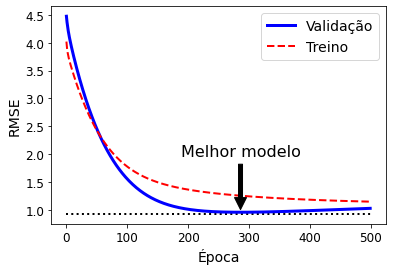

In [64]:
np.random.seed(98)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=98)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Melhor modelo',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # apenas para deixar a estética do gráfico melhor
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validação")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Treino")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Época", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

A seguir, uma implementação básica de para antecipada:

In [59]:
from sklearn.base import clone

In [65]:
# Preparar os dados
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                      learning_rate='constant', eta0=0.0005)

minimun_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continua de onde parou
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimun_val_error:
        minimun_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\Jupyter\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

In [66]:
best_epoch, best_model

(286,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              warm_start=True))

Vale ressaltar que com **warm_start=True** quando o método **fit()** é chamado, ele apenas continua o treinamento de onde foi deixado em vez de começar tudo de volta.

### Regressão Logística

Como discutido no Capítulo 1, alguns algoritmos de regressão também podem ser utilizados para classificação (e vice-versa). A *Regressão Logística* (conhecida como *Regressão Logit*) é normalmente utilizada para estimar a probilidade de uma instância pertencer a uma determinada classe. Por exemplo, qual a probabilidade desse e-mail ser um spam? Se a probabilidade estimada for maior do que 50%, então o nosso modelo prevê que a instância pertence a essa classe (chamada de classe positiva, rotulada como "1"), ou então ela prevê que não (pertencente à classe negativa, rotulada como "0"). Isso o transforma em um classificador binário.

**Estimando Probabilidades**

Mas, como funciona? Do mesmo modo como um modelo de Regressão Linear, um modelo de Regressão Logística calcla uma soma ponderada das características de entrada, mais um termo de polarização. Mas, ao invés de gerar o resultado diretamente como o modelo de Regressão Linear, gera a logística desse resultado.

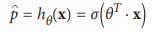

***Modelo de regressão logística probabilidade estimada (forma vetorizada)***

A logística, chamada de *logit* também; subscrita *σ*(·), é uma *função sigmóide* (em formato-S) que mostra um número entre 0 e 1. É definida pela equação abaixo.

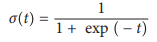

***Função Logística***

Abaixo o código para gerar plotagem dessa função:

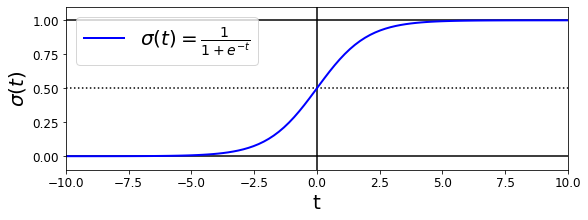

In [79]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k:')
plt.plot([-10, 10], [1, 1], 'k-')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth=2,
         label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.xlabel('t', fontsize=20)
plt.ylabel(r'$\sigma(t)$', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

Uma vez que o modelo de Regressão Logística estimou a probabilidade  p = hθ(**x**) que a instância **x** pertence à classe positiva, ela pode fazer facilmente sua previsão ŷ. 

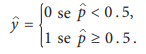

***Previsão do modelo de regressão logística***

Note que *σ*(t) < 0,5 quando t < 0 e *σ*(t) ≥ 0,5 quando t ≥ 0. Logo, um modelo de Regressão Logística prevê 1 se *θT*.**x** for positivo, e 0 se for negativo.

**Treinamento e Função de Custo**

Até agora, sabemos como um modelo de Regressão Logística estima as probabilidades e realiza previsões. Mas como ele treina para isso? O objetivo de treinamento é definir o vetor do parâmetro *θ* para que o modelo estime altas probabilidades para instâncias positivas (*y* = 1) e baixas probabilidades para instâncias negativas (*y* = 0). A função de custo incorpora essa ideia mostrada equação a seguir para uma instância de treino única **x**.

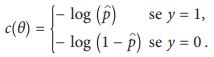

***Função de custo de uma instância de treinamento única***

Essa função de custo faz sentido porque *-log(t)* cresce muito quando *t* se aproxima de 0, então o custo será maior se o modelo estimar uma probabilidade próxima a 0 para uma instância positiva, e também será muito maior se o modelo estimar uma probabilidade perto de 1 para uma instância negativa. Por outro lado, *-log(t)* é próximo a 0 quando *t* for perto de 1, logo o custo será próximo de 0 se a probabilidade estimada for perto de 0 para uma instância negativa ou próxima de 1 para uma instância positiva, que no fim das contas é o que queremos.

A função de custo em relação a todo o conjunto de treinamento é simplesmente o custo médio em relação a todas as instâncias de treino. Ela pode ser descrita em uma simples função, conhecida como *log loss*.

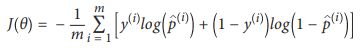

***Função de custo de Regressão Logística (log loss)***

A desvantagem é qe não existe equação de forma fechada conhecida para calcular o valor de *θ* qe minimize esta função (não existe uma equivalente do Método dos Mínimos Quadrados). Mas a vantagem é que essa função de custo é convexa, então o GD (ou qualquer outro algoritmo de otmimização) certifica-se de encontrar o mínimo global. As derivadas parciais da função de custo com relação ao j-*ésimo* modelo do parâmetro *θj* é fornecida pela equação a seguir.

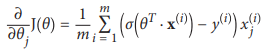

***Derivada parcial da função de custo logística***

Esta equação possui semelhanças com a *Derivadas parciais da função de custo*: ela calcula o erro de previsão para cada instância, o multiplica pelo valor a j-*ésima* característica, e então calcula a média em relação a todas as instância de treinamento. Uma vez que seja obtido o valor de gradiente contendo todas as derivadas parciais, podemos usá-las no algoritmo do GD. É isso: agora sabemos como treinar um modelo de Regressão Logística. Para o GD, poderiamos pegar uma instância por vez, e para o GD Minilote poderiamos usar um minilote por vez.

**Fronteiras de Decisão**

Para agora, usaremos o conjunto de dados da íris para ilustrar a Regressão Logística. Este é um famoso conjunto de dados que possui o comprimento e a largura das sépalas e pétalas de 150 flores de íris de três diferentes espécies: Iris Setosa, Iris Versicolor e Iris Virginica.

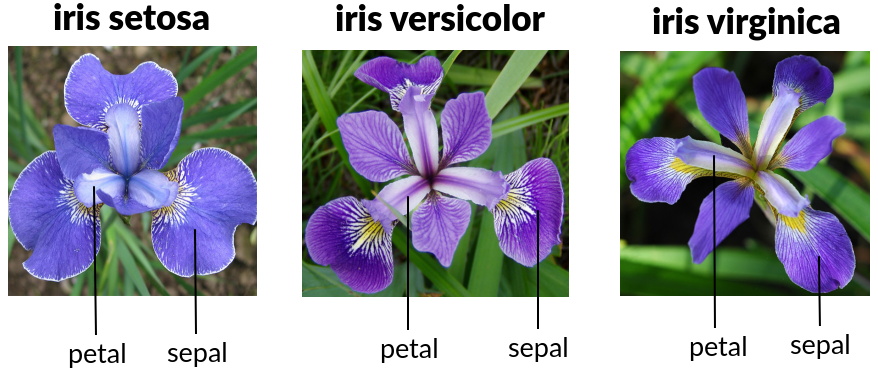

Tentaremos construir um classificador para detectar o tipo Iris Virginica baseado somente na característica do comprimento da pétala. Primeiro vamos carregar os dados:

In [11]:
from sklearn import datasets

In [12]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [13]:
X = iris['data'][:, 3:] # largura da pétala
y = (iris['target'] == 2).astype(np.int) # 1 se for Iris Virginica e 0 caso contrário

Agora vamos treinar um modelo de Regressão Logística:

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression(random_state=98)
log_reg.fit(X, y)

LogisticRegression(random_state=98)

Analisaremos as probabilidades estimadas do modelo para flores com larguras de pétalas variando de 0 a 3 cm:

D:\Jupyter\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


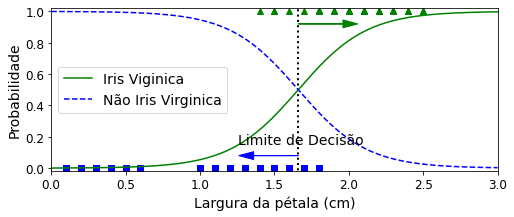

In [16]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], 'bs')
plt.plot(X[y==1], y[y==1], 'g^')
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:',
        linewidth=2)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Viginica')
plt.plot(X_new, y_proba[:, 0], 'b--',
         label='Não Iris Virginica')
plt.text(decision_boundary+0.02, 0.15, 'Limite de Decisão',
        fontsize=14, color='k', ha='center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05,
         head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05,
         head_length=0.1, fc='g', ec='g')
plt.xlabel('Largura da pétala (cm)', fontsize=14)
plt.ylabel('Probabilidade', fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

Vejamos o Limite de Decisão:

In [17]:
decision_boundary

array([1.66066066])

A largura da pétada da espécie Irir Virginica (expressa por triângulos) varia de 1,4  a 2,5 cm; enquanto as outras espécies (expressas por quadrados azuis) normalmente possuem uma largura menor da pétala, variando de 0,1 a 1,8 cm. É possível notar que há um pouco de sobreposição. Quando está acima de 2 cm, o classificador confia muito que seja uma flor Iris Virginica, e se estiver abaixo de 1 cm ele não está tão confiante assim. Entre esses extremos, o classificador não possui tant certeza. Entretanto, podemos pedir que ele preveja uma classe, o modelo retornará a classe que for mais provável. Então, há um *limite de decisão*, perto de 1,6 cm; onde ambas as probabilidades são iguais: se a largura da pétala for superior a esse limite, o classificador prevrá que é uma flor Iris Virginica, ou então que não é:

In [18]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

O código a seguir mostra o mesmo conjunto de dados, mas desta vez exibindo duas características: largura e comprimento da pétala. Uma vez treinado, o classificador pode estimar a probabilidade de uma nova flor ser da espécie Irir Virginica com base nessas duas características. A linha tracejada representa os pontos onde o modelo estima uma probabilidade de 50%: este é o limite de decisão do modelo. Note que é um limite linear. Cada linha paralela representa os pontos onde o modelo produz uma porbabilidade específica, de 15% (inferior esquerda) a 90% (superior direita). Todas as flores além da linha superior direita possuem mais de 90% de chance de serem Iris Virginica de acordo com o modelo:

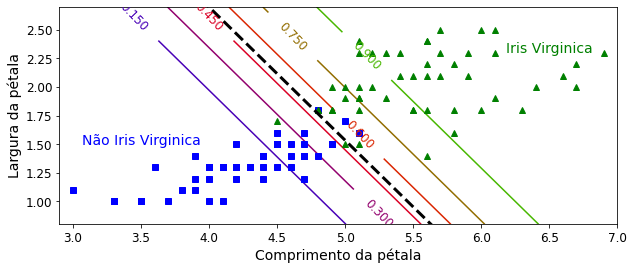

In [19]:
X = iris["data"][:, (2, 3)]  # comprimento da pétala, largura da pétala
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(random_state=98)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Não Iris Virginica", fontsize=14, color="b",
         ha="center")
plt.text(6.5, 2.3, "Iris Virginica", fontsize=14, color="g",
         ha="center")
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.ylabel("Largura da pétala", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

Do mesmo modo como os outros modelos lineares, os modelos de Regressão Logística podem ser regularizados usando as penalidade *l1* e *l2*. Por padrão, o Scikit-Learn usa a penalidade *l2*.

O hiperparâmetros que controla a força de regularização em **LogisticRegression** não é **alpha**, mas o seu inverso **C**. Quanto maior o valor de **C**, *menos* o modelo é regularizado.

**Regressão Softmax**

O modelo de Regressão Logística pode ser generalizado para suportar múltiplas classes diretamente sem a necessidade de treinar e combinar várioas classificadores binários. Isso é conhecido como *Regressão Softmax*, ou *Regressão Logística Multinomial*.

A ideia por trás é bem simples: quando dada uma instância **x**, o modelo de Regressão Softmax calcula primeiramente uma pontuação Sk(**x**) para cada classe *k*, então estima a probabilidade de cada classe aplicando a *função softmax* (conhecida também como *exponecial normalizada*) às pontuações. A equação para calcular Sk(**x**) deve ser familiar, por é a igual a equação de previsão da Regressão Linear.

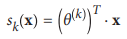

***Pontuação Softmax para a classe k***

Note que cada classe possi seu próprio vetor de parâmetro dedicado *θ^(k)*. Todos esses vetores são guardados tipcamente como linhas na *matriz de parâmetro Θ*.

Uma vez feito o cálculo da pontuaão de cada classe para a instância **x**, podemos estimar a probabilidade *Pk* de a instância pertencer à classe *k* ao executar as pontuações através da função softmax: ela calcular a exponencial de cada pontuação e a normaliza, dividindo pela soma de todas as exponenciais.

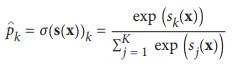

***Função Softmax***

Onde:
- *k* é o número de classes;
- s(**x**) é m vetor que possui as pontuações de cada classe para a instância **x** e;
- σ(s(**x**))k é a probabilidade estimada de que a instância **x** pertença à classe *k*, dadas as pontuações de cada classe para aquela instância.

Semelhante ao classificador de Regressão Logística, o classificador de Regressão Softmax prevê a classe com a maior probabilidade estimada, que é simplesmente a classe com a maior pontuação.

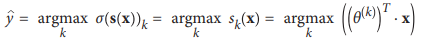

- O operados *argmax* devolve o valor de uma variável que maximiza uma função. Nesta equação ele retorna o valor de *k*, qe maximiza a probabilidade estimada σ(s(**x**))k.

O classificador da Regressão Softmax prevê apenas uma classe por vez, isto é: ele é multiclasse não multioutput. Logo, deve ser usado apenas com classes mutuamente exclusivas. Por exemplo, usar para a classificação de diferentes tipos de plantas, mas não para reconhecer diferentes pessoas em uma única foto.

Agora que sabemos como o modelo estima as probabilidades e realiza previsões, vamos olhar o treinamento. O objetivo é ter um modelo que estime uma alta probabildiade para a classe-alvo. Minimizar a função de custo, denominada *entropia cruzada*, deve levar a esse objetivo porque penaliz o modelo quando ele calcula uma baixa probabilidade para uma classe-alvo. A entropia cruzada é frequentemente utilizada para medir a qualidade da combinação de um conjunto de probabilidades de classe estimadas com as classes-alvo.

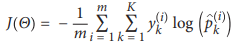

***Função de cusro de entropia cruzada***

Onde:
- *yk^(i)* é igual a 1 se a classe-alvo para a instância i-*ésima* for *k*; caso não, será igual a 0.

Note que, quando existe apenas duas classes (*k* = 2), essa função de custo é equivalente à função de custo da Regressão Logistica (*log loss*)

O vetor gradiente desta função de custo com relação à *θ^(k)* é fornecido pela opção abaixo.

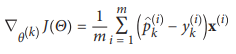

***Vetor gradiente de entropia cruzada para a classe k***

Agora, podemos calcular o vetor gradiente para cada classe e, em seguida, usar o GD (ou qualquer outro algoritmo de otimização) para achar a matriz de parâmetro *Θ* que minimiza a função de custo.

Usaremos a Regressão Softmax para classificar as íris nas três classes. O **LogisticRegression** do Scikit-Learn usa um contra todos automaticamente quando o treinamos em mais de duas classes, mas podemos também configurar o hiperparâmetro **multi_class** para "**multinomial"**, com a finalidade de alterar para a Regressão Softmax. Devemos também especiicar um solucionador que suporte a Regressão Softmax, como o solucionador "**lbfgs**". Ele também aplica a regularização *l2* por padrão, que podemos controlar usando o hiperparâmetro **C**.

In [21]:
X = iris['data'][:, (2, 3)] # comprimento da pétala, largura da pétala
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',
                                solver='lbfgs', C=10,
                                random_state=98)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=98)

Então, na próxima vez que encontrarmos uma íris com pétalas de 5 cm de comprimento e 2 cm de largura, podemos solicitar ao nosso modelo para nos informar qual a espécie de íris estamos analisando, ele ele responderá com 94,2% de certeza que é uma Iris Virginica.

In [22]:
softmax_reg.predict([[5, 2]])

array([2])

In [23]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

O código abaixo mostra os limites de decisão resultantes, representados pelas cores de fundo. Note que os limites de decisão entre duas classes são lineares. A imagem também mostra as probabilidades para a classe Iris Versicolor, representada pelas linhas curvas. Por exemplo, a linha marcada co 0,450 representa o limite de probabilidade de 45%. Veja também que o modelo pode prever uma classe que possua uma probabilidade estimada abaixo de 50%. Por exemplo, no ponto em que todos os limites da decisão se encontram, todas as classes possuem uma mesma probabilidade de 33%.

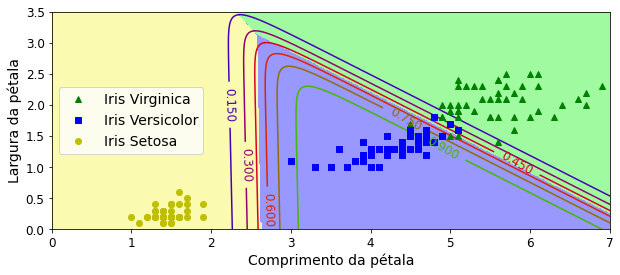

In [25]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.ylabel("Largura da pétala", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

### Exercícios

**1. Qual algoritmo de treinamento de Regressão Linear podemos utilizar se tivermos
um conjunto de treinamento com milhões de características?**

Se tivermos um conjunto de treinamento com milhões de características, e se o conjunto de treinamento couber na memória, o GD Estocástico ou em Minilote pode ser usado, talvez o GD em Lote se possível. Mas usar o Método dos Mínimos Quadrados é um erro nesse caso, uma vez que a complexidade dos cálculos cresce muito rápido, mais do que quadraticamente, devido ao número de características.

**2. Suponha que as características do seu conjunto de treinamento tenham escalas
muito diferentes. Que algoritmos podem sofrer com isso, e como? O que você
pode fazer a respeito?**

Se as características do nosso conjunto de treino tiverem escalas bem distintas, a função de custo terá a o formato de uma parábola alongada, logo, os algoritmos de GD levarão muito tempo para convergir. Para contornar essa situação, devemos escalonar os dados antes de treinar o modelo. Note que o Método dos Mínimos Quadrados trabalhará bem sem o escalonamento. Além disso, modelos regularizados podem convergir para uma solução subótima se as características não forem dimensionadas: na verdade, as características com valores menores serão ignoradas quando comparadas com as de valores maiores, pois a regularização penaliza grandes pesos.

**3. O Gradiente Descendente pode ficar preso em um mínimo local ao treinar um
modelo de Regressão Logística?**

Ao treinar um modelo de Regressão Logística, O GD não poderá ficar preso no mínimo local, uma vez que a função de custo é convexa.

**4. Se todos os algoritmos do Gradiente Descendente forem executados com tempo
suficiente, eles o levarão ao mesmo modelo?**

Se o problema de otmimização for convexo (como a Regressão Linear ou a Logística), e partindo do pressuposto que a taxa de aprendizado não tão alta, todos os algoritmos do GD chegarão bem próximo do mínimo global e acabarão produzindo modelos vem semelhantes. Contudo, se reduzirmos gradativamente a taxa de aprendizado, o GD Estocástico e o GD em Minilote nunca convergirão realmente; ao invés disso, continuarão pulando de uma lado para outro em torno do mínimo global. Isso diz que, mesmo que deixássemos os algoritmos rodarem por um longo tempo, os modelos seriam ligeiramente distintos.

**5. Suponha que você utilize o Gradiente Descendente em Lote e plote seu erro de
validação em cada época. Se você notar que o erro de validação sempre aumenta,
o que provavelmente está acontecendo? Como consertar isso?**

Se o erro de validação aumentar consistentemente após cada época, então uma possibilidade é que a taxa de aprendizado seja muito alta e o algoritmo seja divergente. Se o erro de treinamento aumentar, está claro que o problema deve ser reduzir a taxa de aprendizado. Porém, se o erro não estiver aumentando, então o nosso modelo estará sobrejustando ao conjunto de treino e devemos parar o treinamento.

**6. É uma boa ideia parar o Gradiente Descendente em Minilote imediatamente quando
o erro de validação aumentar?**

Devido a natureza aleatória, nem o GD Estocástico nem o em Minilote garantem o progresso em cada iteração do treino. Então, quando o treino é interompido, logo após o erro de validação aumentar, podemos estar parando cedo demais, antes que o ótimo seja alcançado. Uma solução seria salvar o modelo em intervalos regulares e, não havendo melhora por um longo período, poderemos reverter para o melhor modelo salvo.

**7. Qual algoritmo Gradiente Descendente (entre aqueles que discutimos) se aproximará mais rapidamente da solução ideal? Qual realmente convergirá? Como você
pode fazer os outros convergirem também?**

O GD Estocástico possui a iteração de treino mais rápida, porque considera apenas uma instância de treino por vez, então na maioria das vezes ele é o primeiro a chegar na vizinhança do  mínimo global (ou o GD de Minilotes se o minilote for bem pequeno). Entretanto, dado o tempo de treino necessário, apenas o GD em Lote convergirá. Como dito, o GD Estocástico e o de Minilote chegarão bem perto do mínimo, a menos se reduzirmos de modo gradual a taxa de aprendizado.

**8. Suponha que esteja utilizando a Regressão Polinomial. Você plota as curvas de
aprendizado e percebe que existe um grande hiato entre o erro de treinamento e o
de validação. O que está acontecendo? Quais são as três maneiras de resolver isso?**

Se o erro de validação for muito maior do que o de treino, possivelmente o modeolo está se sobreajustando aos dados de treino. Uma solução para esse probema é reduzir o grau do polinômio: um modelo com menos graus de liberdade é menos propenso a se sobreajustar. Outra solução é tentar regularizar o modelo (por exemplo, adicionar uma penalisade *l1* (Lasso) ou *l2* (Ridge) à função de custo. Isso também diminuirá os graus de liberdade do modelo. Como última solução, podemos aumentar o tamanho do conjunto de treino.

**9. Suponha que você esteja utilizando a Regressão de Ridge e perceba que o erro
de treinamento e o de validação são quase iguais e bastante altos. Você diria que
o modelo sofre de um viés elevado ou de alta variância? Devemos aumentar o
hiperparâmetro α ou reduzi-lo?**

Se o erro de treino quanto o de validação forem bem parecidos e razoavelmente altos, o modelo possivelmente está se subajustando ao conjunto de treino, o que diz que ele possui um alto viés e devemos reduzir o *α*.

**10. Por que você utilizaria:**
- Regressão de Ridge em vez de Regressão Linear simples (ou seja, sem qualquer
regularização)?
- Lasso em vez de Regressão de Ridge?
- Elastic Net em vez de Lasso?

- Geralmente, um modelo com alguma regularização possui um desempenho melhor do que um modelo sem qualquer regularização, logo, devemos preferir a Regressão de Ridge em relação  Linear Simples.
- A Regressão Lasso usa a penalidade *l1* que tende a empurrar os pesos para, exatamente, zero, levando a modelos esparsos nos quais todos os pesos valem 0, exceto para os mais importantes. Esse é uma forma de executar automaticamente a seleção das características, o que é bom, caso suspeitamos que apenas algumas realmente importam. Se não tivermos certeza, melhor usar a Regressão de Ridge.
- Uma vez que a Lasso pode se comportar de modo equivocado em alguns casos (quando várias características são fortemente correlacionadas ou quando existe mais características do que instâncias de treino), a Elastic Net normalmente é usada. Contudo, ela adiciona um hiperparâmetro extra de ajuste. Se quisermos apenas a Lasso sem o comportamento errático, podemos usar a Elastic Net com o **l1_ratio** próximo de 1.

**11. Suponha que você deseja classificar fotos como exteriores/interiores e dia/noite.
Você deve implementar dois classificadores de Regressão Logística ou um de Regressão Softmax?**

Devemos treinar dois classificadores de Regressão Logística se quisermos classificar imagens como externas/internas e diurnas/noturnas, já qe estas não são classes exclusivas, isto é: todas as quatro combinações são possíveis.

# Término: 27/09/2021